# Visualizing Data about Netflix's Stock

This project uses data for [Netflix](https://www.netflix.com/se-en/)'s Stock from [Yahoo Finance](https://finance.yahoo.com/quote/DATA/) for 2017. Codecademy has provided the dataset and instructions. 

I visualize the distribution of Netflix's stock price, earnings and revenue. I also provide a comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017. 

### Step 1: Import necessary Python modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

### Step 2: Ingest the data

In [6]:
df_netflix_stock = pd.read_csv('NFLX.csv')
df_dj = pd.read_csv('DJI.csv')

In [27]:
# Data about dividends per share is provided separately.
# The estimate for the Quarter is provided by Yahoo and is compared to the actual dividends for the same period.

x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

### Step 3: Examine the data

In [7]:
print(df_netflix_stock.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


In [8]:
print(df_dj.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  


Note: The 'Adj Close' column represents the adjusted close price adjusted for both dividends and splits. We will rename the column to 'Price'.

In [16]:
df_netflix_stock.rename(columns = {'Adj Close': 'Price'}, inplace = True)
df_dj.rename(columns = {'Adj Close': 'Price'}, inplace = True)

### Step 4: Visualize the distribution of Netflix's stock prices

Text(0.5, 1.0, 'Distribution of 2017 Netflix Stock Price')

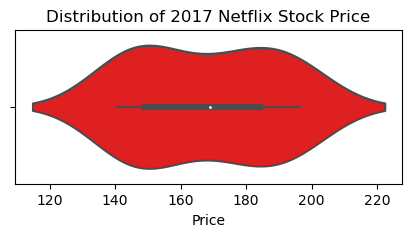

In [24]:
f, ax = plt.subplots(figsize = (5, 2))
sns.violinplot(x = df_netflix_stock['Price'], color = 'red')
ax.set_title('Distribution of 2017 Netflix Stock Price')

The median, which is represented by the white dot in the visualization, is at price of 170. The data is symmetrically distributed and the interquartile range (represented by the thick black line) falls between 150 and 190. Thus, this is the range with most of the prices in 2017. 

### Step 5: Plot the performance of the dividends per share

Text(0.5, 1.0, 'Dividends per share in cents')

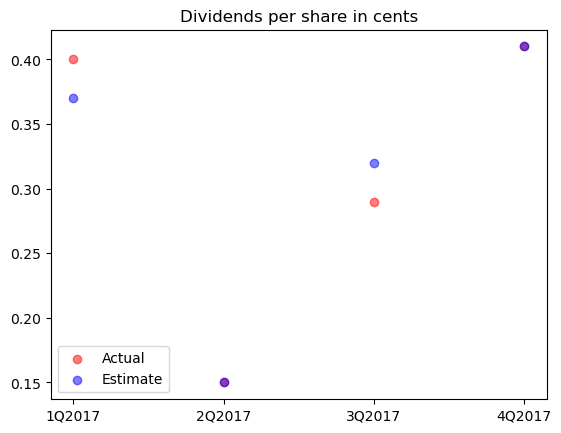

In [33]:
plt.scatter(x = x_positions, y = earnings_actual, color = 'red', alpha = 0.5)
plt.scatter(x = x_positions, y = earnings_estimate, color = 'blue', alpha = 0.5)
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Dividends per share in cents')
# plt.savefig("Netflix - Dividends per share.png")

The estimated and actual values for dividends per share are very close and even overlap for 2Q2017 and 4Q2017.

### Step 6: Visualize Netflix's revenue and earnings side-by-side

Text(0.5, 1.0, 'Netflix Revenue and Earnings in $ Billions')

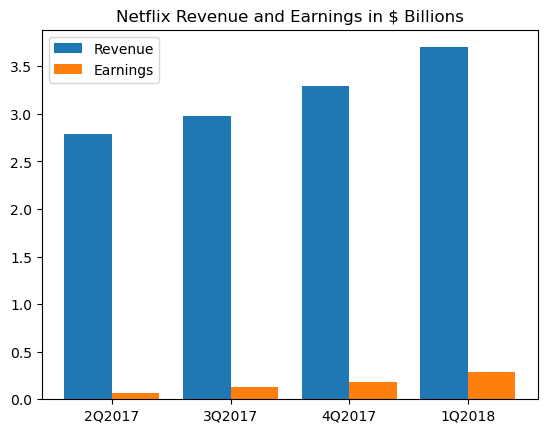

In [41]:
# The following information (in billions of US dollars) is provided for the revenue and earnings in the period 2Q 2017 - 1Q2018
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# In order to plot two barplots side-by-side we need to first compute the width of each bar.

# Revenue
n  = 1  # This is our first dataset (out of 2)
t  = 2 # Number of dataset
d  = 4 # Number of sets of bars
w  = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element in range(d)]

plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element in range(d)]

plt.bar(bars2_x, earnings_by_quarter)

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
plt.xticks(middle_x, quarter_labels)
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.title("Netflix Revenue and Earnings in $ Billions")


The revenue and earnings are both increasing with a similar rate in the period 2Q2017 - 1Q2018. Earnings represent almost 8% of the revenue in 1Q2018.

### Step 7: Compare the performance of Netflix's stock and Dow Jones

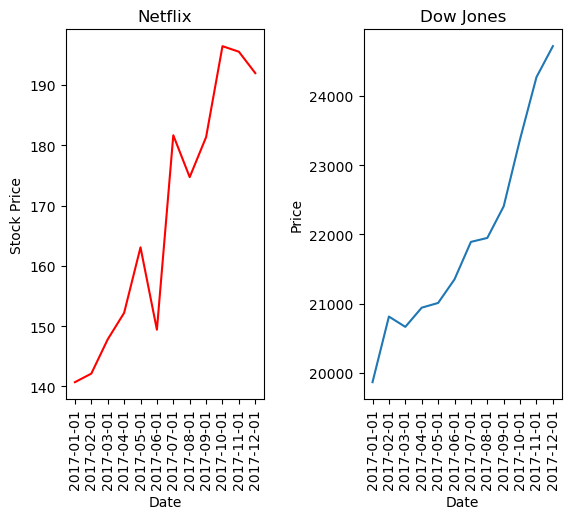

In [47]:
# We will plot two line charts side-by-side in one figure. 

# Left plot: Netflix
ax1 = plt.subplot(1, 2, 1)
plt.plot(df_netflix_stock['Date'], df_netflix_stock['Price'], color = 'red')
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
# Styling
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=.5)

# Right plot: Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(df_dj['Date'], df_dj['Price'])
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')

# Styling
plt.xticks(rotation='vertical')
plt.subplots_adjust(wspace=.5)


The stock price of Netflix is more volatile but seems to follow similar trends as Dow Jones. However, after October 2017 there is a decline in Netflix's stock price while Dow Jones keeps increasing.